In [1]:
import nltk
from pprint import pprint
import math

import spacy
nlp = spacy.load("en_core_web_sm")

## Resources
## n-gram model: https://github.com/joshualoehr/ngram-language-model/tree/master

In [2]:
text = open("/content/NLP.txt").read()
print(text[0:100], "...")

Анализ саундтреков из аккаунтов пользователей позволяет сделать выводы об их музыкальных предпочтени ...


In [19]:
SOS = "<s> "
EOS = "</s>"
UNK = "<UNK>"

def add_sentence_tokens(sentences, n):
    """Wrap each sentence in SOS and EOS tokens.

    For n >= 2, n-1 SOS tokens are added, otherwise only one is added.

    Args:
        sentences (list of str): the sentences to wrap.
        n (int): order of the n-gram model which will use these sentences.
    Returns:
        List of sentences with SOS and EOS tokens wrapped around them.

    """
    sos = SOS * (n-1) if n > 1 else SOS
    return ['{}{} {}'.format(sos, s, EOS) for s in sentences]

def replace_singletons(tokens):
    """Replace tokens which appear only once in the corpus with <UNK>.

    Args:
        tokens (list of str): the tokens comprising the corpus.
    Returns:
        The same list of tokens with each singleton replaced by <UNK>.

    """
    vocab = nltk.FreqDist(tokens)
    return [token if vocab[token] > 1 else UNK for token in tokens]

def preprocess(sentences, n):
    """Add SOS/EOS/UNK tokens to given sentences and tokenize.

    Args:
        sentences (list of str): the sentences to preprocess.
        n (int): order of the n-gram model which will use these sentences.
    Returns:
        The preprocessed sentences, tokenized by words.

    """
    sentences = add_sentence_tokens(sentences, n)
    tokens = ' '.join(sentences).split(' ')
    tokens = replace_singletons(tokens)
    return tokens

In [20]:
doc = nlp(text)
sentences = [s.text.lower() for s in doc.sents]
sentences

['анализ саундтреков из аккаунтов пользователей позволяет сделать выводы об их музыкальных предпочтениях.',
 'а используя наработанные коррелянты можно судить о характере пользователя.\n',
 'например, считается: экстраверты в целом чаще слушают музыку и их музыкальные предпочтения более разнообразны, однако они более склонны к поп, хип-хоп, сценической и современной-хитовой музыке.',
 'экстраверты мало слушают музыку, которая «старше их по возрасту»: т.е. экстраверт 1990 года рождения практически не будет слушать музыку, вышедшую раньше своего рождения.\n',
 'у интровертов это наблюдается в разы чаще.',
 'экстраверты чаще слушают музыку в качестве фона.',
 'при этом, - доказано, что экстраверты по сравнению с интровертами, чаще слушают музыку со словами, чем без слов.',
 'интроверты практически не слушают современные хиты из топ-10, а начинают их слушать (и покупать) спустя почти год после их выхода.\n',
 '«доброжелательные» люди имеют четко ограниченный набор любимых песен и предпочит

In [21]:
processed_tokens = preprocess(sentences, 3)
processed_tokens

['<s>',
 '<s>',
 '<UNK>',
 '<UNK>',
 'из',
 '<UNK>',
 'пользователей',
 '<UNK>',
 'сделать',
 '<UNK>',
 'об',
 'их',
 'музыкальных',
 '<UNK>',
 '</s>',
 '<s>',
 '<s>',
 'а',
 '<UNK>',
 '<UNK>',
 '<UNK>',
 '<UNK>',
 '<UNK>',
 'о',
 '<UNK>',
 '<UNK>',
 '</s>',
 '<s>',
 '<s>',
 '<UNK>',
 '<UNK>',
 'экстраверты',
 'в',
 '<UNK>',
 'чаще',
 'слушают',
 'музыку',
 'и',
 'их',
 '<UNK>',
 '<UNK>',
 'более',
 '<UNK>',
 '<UNK>',
 '<UNK>',
 'более',
 '<UNK>',
 'к',
 '<UNK>',
 '<UNK>',
 '<UNK>',
 'и',
 '<UNK>',
 '<UNK>',
 '</s>',
 '<s>',
 '<s>',
 'экстраверты',
 '<UNK>',
 'слушают',
 'музыку,',
 'которая',
 '<UNK>',
 'их',
 'по',
 '<UNK>',
 '<UNK>',
 '<UNK>',
 '<UNK>',
 '<UNK>',
 '<UNK>',
 'практически',
 'не',
 'будет',
 'слушать',
 'музыку,',
 '<UNK>',
 '<UNK>',
 '<UNK>',
 '<UNK>',
 '</s>',
 '<s>',
 '<s>',
 'у',
 '<UNK>',
 '<UNK>',
 '<UNK>',
 'в',
 '<UNK>',
 '<UNK>',
 '</s>',
 '<s>',
 '<s>',
 'экстраверты',
 'чаще',
 'слушают',
 'музыку',
 'в',
 '<UNK>',
 '<UNK>',
 '</s>',
 '<s>',
 '<s>',
 '<UNK>

**Вывод**: Часто встречаются в словаре слова, такие как "экстраверты", "музыку", "чаще", которые складывааются в следующие предложения:

"экстраверты чаще слушают",

"люди предпочитают музыку",

"коррелирует с музыкальных…".

In [22]:
vocabulary  = nltk.FreqDist(processed_tokens)
vocabulary

FreqDist({'<UNK>': 174, '<s>': 40, '</s>': 20, 'и': 13, 'с': 7, 'слушают': 6, 'их': 5, 'а': 4, 'экстраверты': 4, 'в': 4, ...})

**Вывод**:
1.   Словарь содержит много уникальных слов, <UNK> заменяет их, тем самым значительно уменьшая размер словаря;
2.   "и" - Самое часто встречающееся слово (13 раз)

In [23]:
N = 3
vocab_size = len(vocabulary)
print(vocab_size)

n_grams = nltk.ngrams(processed_tokens, N)
n_vocab = nltk.FreqDist(n_grams)

m_grams = nltk.ngrams(processed_tokens, N-1)
m_vocab = nltk.FreqDist(m_grams)

print(n_vocab)
print(m_vocab)

38
<FreqDist with 173 samples and 347 outcomes>
<FreqDist with 107 samples and 348 outcomes>


**Вывод**: Размер словаря = 38 — это очень небольшой словарь.
Уникальных триграмм: 173, уникальных биграмм: 107.

In [24]:
for n_gram, c in n_vocab.items():
    print(n_gram, c)

('<s>', '<s>', '<UNK>') 13
('<s>', '<UNK>', '<UNK>') 10
('<UNK>', '<UNK>', 'из') 2
('<UNK>', 'из', '<UNK>') 2
('из', '<UNK>', 'пользователей') 1
('<UNK>', 'пользователей', '<UNK>') 2
('пользователей', '<UNK>', 'сделать') 2
('<UNK>', 'сделать', '<UNK>') 2
('сделать', '<UNK>', 'об') 2
('<UNK>', 'об', 'их') 1
('об', 'их', 'музыкальных') 1
('их', 'музыкальных', '<UNK>') 1
('музыкальных', '<UNK>', '</s>') 2
('<UNK>', '</s>', '<s>') 19
('</s>', '<s>', '<s>') 19
('<s>', '<s>', 'а') 1
('<s>', 'а', '<UNK>') 1
('а', '<UNK>', '<UNK>') 1
('<UNK>', '<UNK>', '<UNK>') 45
('<UNK>', '<UNK>', 'о') 1
('<UNK>', 'о', '<UNK>') 2
('о', '<UNK>', '<UNK>') 1
('<UNK>', '<UNK>', '</s>') 13
('<UNK>', '<UNK>', 'экстраверты') 1
('<UNK>', 'экстраверты', 'в') 1
('экстраверты', 'в', '<UNK>') 1
('в', '<UNK>', 'чаще') 1
('<UNK>', 'чаще', 'слушают') 2
('чаще', 'слушают', 'музыку') 3
('слушают', 'музыку', 'и') 1
('музыку', 'и', 'их') 1
('и', 'их', '<UNK>') 1
('их', '<UNK>', '<UNK>') 1
('<UNK>', '<UNK>', 'более') 3
('<UNK>'

In [25]:
k = 1
probabilities = {}
for n_gram, n_count in n_vocab.items():
    #print(n_gram, c)
    m_gram = n_gram[:-1]
    m_count = m_vocab.get(m_gram, 0)
    probabilities[n_gram] = -math.log((n_count + k) / (m_count + k * vocab_size))

probabilities

{('<s>', '<s>', '<UNK>'): 1.4213856809311607,
 ('<s>', '<UNK>', '<UNK>'): 1.5339303599259553,
 ('<UNK>', '<UNK>', 'из'): 3.7534179752515073,
 ('<UNK>', 'из', '<UNK>'): 2.5902671654458267,
 ('из', '<UNK>', 'пользователей'): 2.995732273553991,
 ('<UNK>', 'пользователей', '<UNK>'): 2.5902671654458267,
 ('пользователей', '<UNK>', 'сделать'): 2.5902671654458267,
 ('<UNK>', 'сделать', '<UNK>'): 2.5902671654458267,
 ('сделать', '<UNK>', 'об'): 2.5902671654458267,
 ('<UNK>', 'об', 'их'): 2.995732273553991,
 ('об', 'их', 'музыкальных'): 2.9704144655697013,
 ('их', 'музыкальных', '<UNK>'): 2.9704144655697013,
 ('музыкальных', '<UNK>', '</s>'): 2.6149597780361984,
 ('<UNK>', '</s>', '<s>'): 1.0647107369924282,
 ('</s>', '<s>', '<s>'): 1.0473189942805592,
 ('<s>', '<s>', 'а'): 3.367295829986474,
 ('<s>', 'а', '<UNK>'): 2.9704144655697013,
 ('а', '<UNK>', '<UNK>'): 3.0204248861443626,
 ('<UNK>', '<UNK>', '<UNK>'): 1.0233888674305223,
 ('<UNK>', '<UNK>', 'о'): 4.1588830833596715,
 ('<UNK>', 'о', '<U

In [33]:
top_n = 10
top_ngrams = sorted(probabilities.items(), key=lambda x: x[1])[:top_n]
for ngram, prob in top_ngrams:
    print(ngram, math.exp(-prob))

('<UNK>', '<UNK>', '<UNK>') 0.35937499999999994
('</s>', '<s>', '<s>') 0.3508771929824561
('<UNK>', '</s>', '<s>') 0.3448275862068966
('<s>', '<s>', '<UNK>') 0.2413793103448276
('<s>', '<UNK>', '<UNK>') 0.2156862745098039
('<UNK>', 'и', '<UNK>') 0.2040816326530612
('с', '<UNK>', '<UNK>') 0.13333333333333333
('<UNK>', '<UNK>', '</s>') 0.10937500000000001
('чаще', 'слушают', 'музыку') 0.0975609756097561
('<UNK>', 'более', '<UNK>') 0.0975609756097561


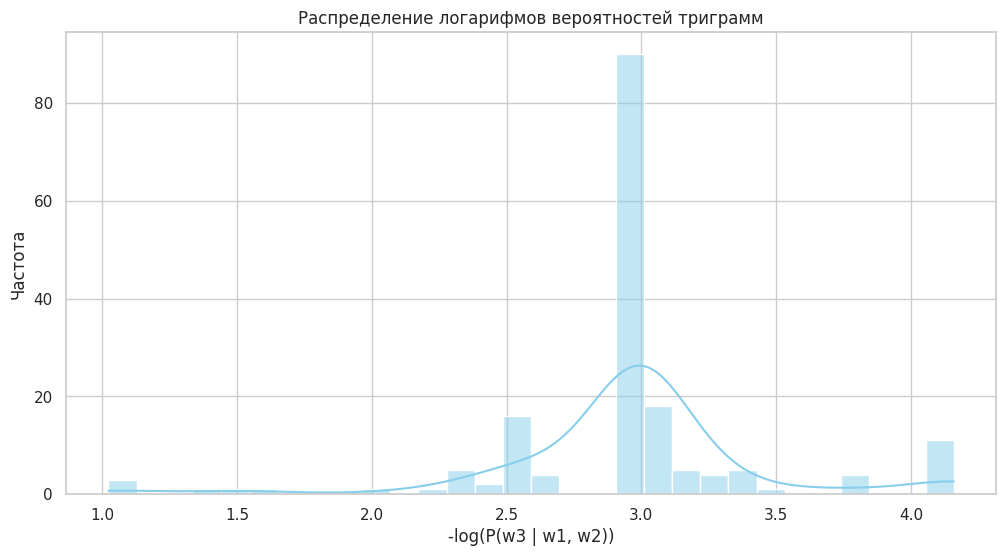

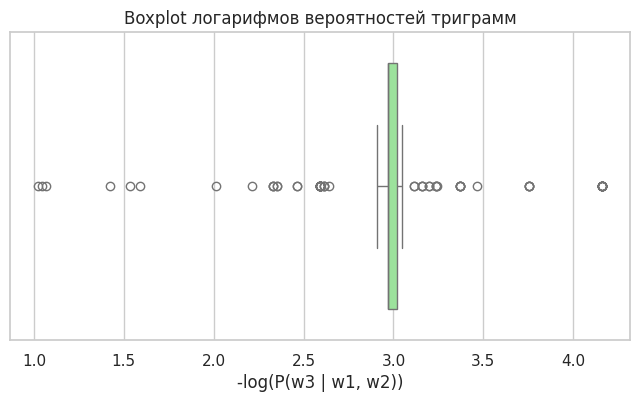

<ipython-input-36-a93f632318ef>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=probs, y=trigrams, palette="viridis")


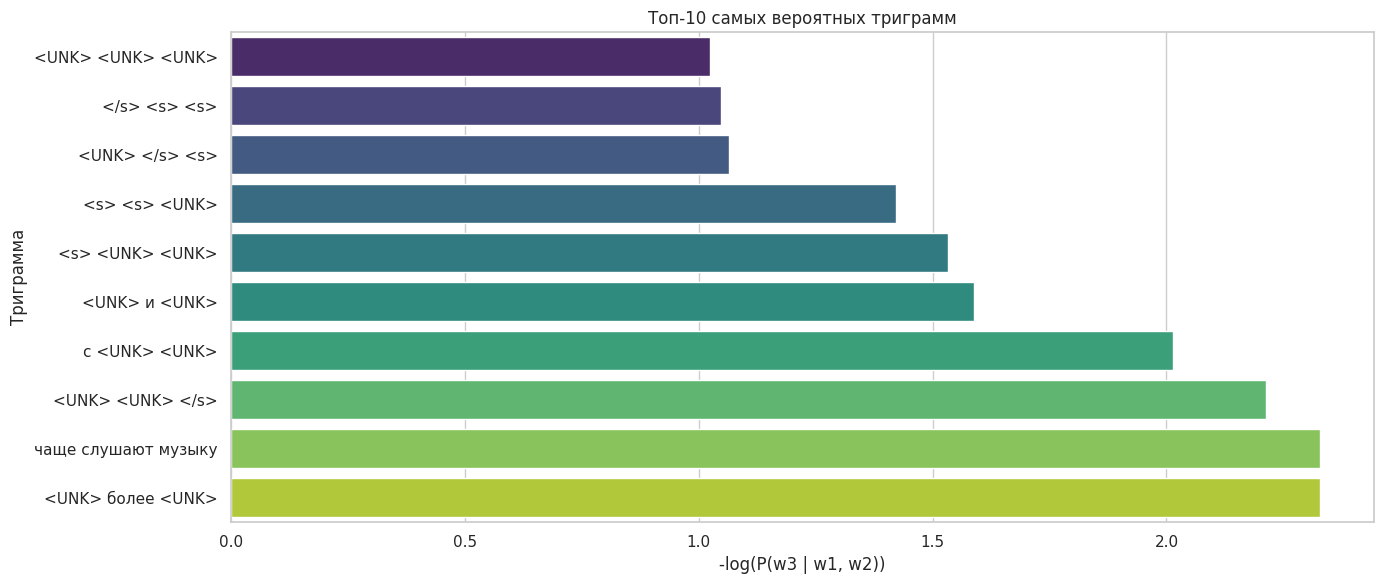

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

prob_values = list(probabilities.values())
log_probs = np.array(prob_values)
sns.set(style="whitegrid")

# Гистограмма распределения
plt.figure(figsize=(12, 6))
sns.histplot(log_probs, bins=30, kde=True, color="skyblue")
plt.title("Распределение логарифмов вероятностей триграмм")
plt.xlabel("-log(P(w3 | w1, w2))")
plt.ylabel("Частота")
plt.show()

# Boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=log_probs, color="lightgreen")
plt.title("Boxplot логарифмов вероятностей триграмм")
plt.xlabel("-log(P(w3 | w1, w2))")
plt.show()

# Топ-10 самых вероятных триграмм (с наименьшим -log вероятности)
top_10 = sorted(probabilities.items(), key=lambda x: x[1])[:10]
trigrams, probs = zip(*top_10)
trigrams = [' '.join(t) for t in trigrams]

plt.figure(figsize=(14, 6))
sns.barplot(x=probs, y=trigrams, palette="viridis")
plt.title("Топ-10 самых вероятных триграмм")
plt.xlabel("-log(P(w3 | w1, w2))")
plt.ylabel("Триграмма")
plt.tight_layout()
plt.show()

In [26]:
def _best_candidate(model, prev, i, without=[]):
    """Choose the most likely next token given the previous (n-1) tokens.

    If selecting the first word of the sentence (after the SOS tokens),
    the i'th best candidate will be selected, to create variety.
    If no candidates are found, the EOS token is returned with probability 1.

    Args:
        prev (tuple of str): the previous n-1 tokens of the sentence.
        i (int): which candidate to select if not the most probable one.
        without (list of str): tokens to exclude from the candidates list.
    Returns:
        A tuple with the next most probable token and its corresponding probability.

    """
    blacklist  = ["<UNK>"] + without
    candidates = ((ngram[-1],prob) for ngram,prob in model.items() if ngram[:-1]==prev)
    candidates = filter(lambda candidate: candidate[0] not in blacklist, candidates)
    candidates = sorted(candidates, key=lambda candidate: candidate[1], reverse=True)
    if len(candidates) == 0:
        return ("</s>", 1)
    else:
        return candidates[0 if prev != () and prev[-1] != "<s>" else i]


In [32]:
num_sents = 5
min_len = 10
max_len = 30
for i in range(num_sents):
    sent, prob = ["<s>"] * max(1, N-1), 1
    while sent[-1] != "</s>":
        prev = () if N == 1 else tuple(sent[-(N-1):])
        blacklist = sent + (["</s>"] if len(sent) < min_len else [])
        next_token, next_prob = _best_candidate(probabilities, prev, i, without=blacklist)
        sent.append(next_token)
        prob += next_prob

        if len(sent) >= max_len:
            sent.append("</s>")

    print(' '.join(sent), 1/prob)

<s> <s> а </s> 0.18631356118161274
<s> <s> у </s> 0.18631356118161274
<s> <s> доброжелательные люди достоверно чаще предпочитают </s> 0.05788956136214211
<s> <s> более </s> 0.18631356118161274
<s> <s> с </s> 0.18631356118161274


**Вывод:** 4/5 сгенерированных предложений обрываются почти сразу после первого слова — это говорит о том, что в распределении вероятностей триграмм сильный перекос в сторону коротких или простых продолжений, особенно с предлогами, вида "<s> <s> а </s>", "<s> <s> с </s>" и т.д.